<a href="https://colab.research.google.com/github/Abhay069/Sales-Prediction-Model/blob/main/Sales_Prediction_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name : Abhay Singh
#Email id: abhaysinghnigaltiya036@gmail.com

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import lightgbm as  lgb
from sklearn.preprocessing import LabelEncoder

In [25]:
# csv to pandas datafram

FMCG_data = pd.read_csv("/content/FMCG_2022_2024.csv")
print("Succesfully Converted to Pandas DataFrame")

# Displaying the data
print("\nNO of Row and Columns")
print(FMCG_data.shape)
#
print("\nGetting some information about the dataset")
print(FMCG_data.info())

print("\nGetting some statistical information about the dataset")
print(FMCG_data.describe())

print ("\nChecking for missing values")
print(FMCG_data.isnull().sum())

Succesfully Converted to Pandas DataFrame

NO of Row and Columns
(190757, 14)

Getting some information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64

In [26]:
# fIRST and last 5 ROWS
print("First 5 rows of dataset")
print(FMCG_data.head())
print("\nLast 5 rows of dataset")
print(FMCG_data.tail())

First 5 rows of dataset
         date     sku     brand    segment category   channel      region  \
0  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail  PL-Central   
1  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail    PL-North   
2  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail    PL-South   
3  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  Discount  PL-Central   
4  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  Discount    PL-North   

   pack_type  price_unit  promotion_flag  delivery_days  stock_available  \
0  Multipack        2.38               0              1              141   
1     Single        1.55               1              3                0   
2     Carton        4.00               0              5              118   
3     Single        5.16               0              2               81   
4     Single        7.66               0              4              148   

   delivered_qty  units_sold  
0            128         

In [27]:
# Adding new column by converting to datatime objects
FMCG_data["date"] = pd.to_datetime(FMCG_data["date"])

# Extract features (time-based)
FMCG_data["day"] = FMCG_data["date"].dt.day
FMCG_data["month"] = FMCG_data["date"].dt.month
FMCG_data["year"] = FMCG_data["date"].dt.year
FMCG_data["day_of_week"] = FMCG_data["date"].dt.dayofweek
FMCG_data["day_of_year"] = FMCG_data["date"].dt.dayofyear
FMCG_data["week_of_year"] = FMCG_data["date"].dt.isocalendar().week.astype(int)
FMCG_data["quarter"] = FMCG_data["date"].dt.quarter

# cyclical Features
# This helps the model understand that time repeats in cycles (e.g., a week, a year).

# Day of the week (cycle of 7 days)
FMCG_data['day_of_week_sin'] = np.sin(2 * np.pi * FMCG_data['day_of_week'] / 7)
FMCG_data['day_of_week_cos'] = np.cos(2 * np.pi * FMCG_data['day_of_week'] / 7)

# Month of the year (cycle of 12 months)
FMCG_data['month_sin'] = np.sin(2 * np.pi * FMCG_data['month'] / 12)
FMCG_data['month_cos'] = np.cos(2 * np.pi * FMCG_data['month'] / 12)

# Day of the year (cycle of 365 days)
# Using 365.25 helps account for leap years
FMCG_data['day_of_year_sin'] = np.sin(2 * np.pi * FMCG_data['day_of_year'] / 365)
FMCG_data['day_of_year_cos'] = np.cos(2 * np.pi * FMCG_data['day_of_year'] / 365)
# Display the new features to verify
print(FMCG_data[['date','year','month','day','quarter','week_of_year','day_of_year','day_of_week','month_sin','month_cos','day_of_week_sin','day_of_week_cos','day_of_year_sin','day_of_year_cos'
]].head(25))


         date  year  month  day  quarter  week_of_year  day_of_year  \
0  2022-01-21  2022      1   21        1             3           21   
1  2022-01-21  2022      1   21        1             3           21   
2  2022-01-21  2022      1   21        1             3           21   
3  2022-01-21  2022      1   21        1             3           21   
4  2022-01-21  2022      1   21        1             3           21   
5  2022-01-21  2022      1   21        1             3           21   
6  2022-01-21  2022      1   21        1             3           21   
7  2022-01-21  2022      1   21        1             3           21   
8  2022-01-22  2022      1   22        1             3           22   
9  2022-01-22  2022      1   22        1             3           22   
10 2022-01-22  2022      1   22        1             3           22   
11 2022-01-22  2022      1   22        1             3           22   
12 2022-01-22  2022      1   22        1             3           22   
13 202

# Data Preprocessing


In [28]:
# Create the new interaction feature while the columns are still text
FMCG_data['b_r_interaction'] = FMCG_data['brand'].astype(str) + '_' + FMCG_data['region'].astype(str)  # The '_': This is a string literal representing a single underscore character. It acts as a separator to make the new, combined text easier to read.
# Identify categorical columns for encoding
#  convert these text-based labels into a numerical format.
numerical_frt = ['sku', 'brand', 'segment', 'category', 'channel', 'region', 'pack_type','b_r_interaction']

# Appling Label Encoding
for col in numerical_frt:
    lbe = LabelEncoder()
    FMCG_data[col] = lbe.fit_transform(FMCG_data[col])

print("Displaying first 25 value of Dataset after adding and encoding the interaction feature:")
print("\n")
print(FMCG_data[['brand', 'region', 'b_r_interaction']].head(25))
# The 'axis=1' part tells pandas you are dropping a column, not a row.
FMCG_data = FMCG_data.drop('date', axis=1)
print("The 'date' column has been dropped.")

print("first 5 line of final feature set:")
print(FMCG_data.head())

Displaying first 25 value of Dataset after adding and encoding the interaction feature:


    brand  region  b_r_interaction
0       1       0                3
1       1       1                4
2       1       2                5
3       1       0                3
4       1       1                4
5       1       2                5
6       1       1                4
7       1       2                5
8       1       0                3
9       1       1                4
10      1       0                3
11      1       1                4
12      1       2                5
13      1       0                3
14      1       2                5
15      4       1               13
16      4       2               14
17      4       1               13
18      4       0               12
19      4       1               13
20      1       0                3
21      1       1                4
22      1       0                3
23      1       1                4
24      1       2                5


# Model Training


In [88]:
# now dropping "unit_sold" and saving it in y variable
X = FMCG_data.drop(["units_sold"],axis = 1)
Y = FMCG_data["units_sold"]
print("---------------------------")
print("Printing value in X :")
print(X)
print("---------------------------")
print ("\n Printing Units sold (Y) :")
print(Y)
print("-------------------------")
# we will split the data in 80% and 20%, 80% for training and 20% for test data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2 , random_state=0)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

print("-----------------------------")
# train the LightGBM Regressor model
model = lgb.LGBMRegressor(random_state=50)

print("-----------------------------")
print("\n")
print ("Training the LightGBM model")

# Fit the data in model
model.fit(X_train,Y_train)
print("------------------------------")
print("Data fited in model")
print("Model training sucessusfull")

# Making prediction on the test set
print("------------------------------")
print("\nShowing the prediction on test set:")
Y_prediction = model.predict(X_test)
print(Y_prediction)

---------------------------
Printing value in X :
        sku  brand  segment  category  channel  region  pack_type  price_unit  \
0         2      1        3         1        2       0          1        2.38   
1         2      1        3         1        2       1          2        1.55   
2         2      1        3         1        2       2          0        4.00   
3         2      1        3         1        0       0          2        5.16   
4         2      1        3         1        0       1          2        7.66   
...     ...    ...      ...       ...      ...     ...        ...         ...   
190752   18      8        7         3        0       1          2        2.55   
190753   18      8        7         3        0       2          2        6.01   
190754   18      8        7         3        1       0          2        3.45   
190755   18      8        7         3        1       1          1        1.93   
190756   18      8        7         3        1       2     

# cecking the prediction test ( error SCORE)

In [89]:
# calulation the score (mean absolute, mean squared, r-squared )

r2_error = r2_score(Y_test,Y_prediction)
print("Root mean Square Error")
print("rsquare:", r2_error)
print("---------------------------------")

ms_error = mean_squared_error(Y_test,Y_prediction)
print("Mean Squared Error")
print("MSE:", ms_error)
print("---------------------------------")

ma_error = mean_absolute_error(Y_test,Y_prediction)
print("Mean Absolute Error")
print("MAE:", ma_error)
print("---------------------------------")

Root mean Square Error
rsquare: 0.794131005202142
---------------------------------
Mean Squared Error
MSE: 28.691321411123496
---------------------------------
Mean Absolute Error
MAE: 3.7146842297266214
---------------------------------


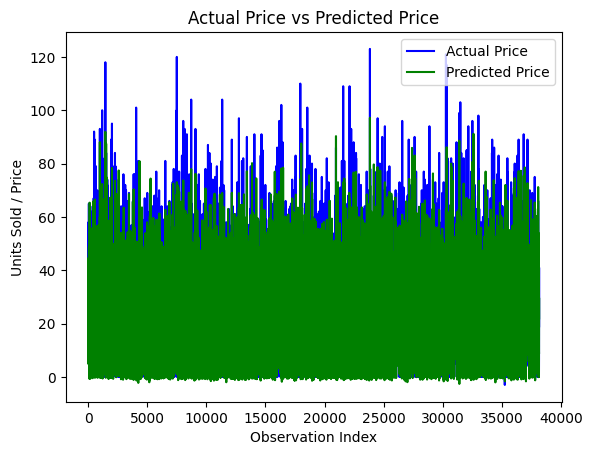

In [90]:
#using other plot method to compair
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Price')
plt.plot(Y_prediction, color='green', label='Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Observation Index')
plt.ylabel('Units Sold / Price')
plt.legend()
plt.show()

In [111]:
# creating copy
results_X = X_test.copy()

# Add the actual, true values from Y_test
results_X['Actual_Sales'] = Y_test

# Add the predictions your model made
results_X['Predicted_Sales'] = Y_prediction

# It's helpful to round the predictions
results_X['Predicted_Sales'] = results_X['Predicted_Sales'].round(0).astype(int)

# Calculate the difference (the error) between the actual and predicted values
results_X['Error'] = results_X['Actual_Sales'] - results_X['Predicted_Sales']

# This shows the date features, key product info, and the results
final_results = results_X[['year','month','day','Actual_Sales','Predicted_Sales','Error']]

print(" Comparison of Actual vs. Predicted Sales with Error:")
print((final_results).head(10))

 Comparison of Actual vs. Predicted Sales with Error:
        year  month  day  Actual_Sales  Predicted_Sales  Error
73827   2023      8   10            23               21      2
113550  2024      1   30            20               17      3
69440   2023      7   22            17               16      1
66585   2023      7    9            12               16     -4
125953  2024      3   24            15               14      1
115648  2024      2    8            19               21     -2
176423  2024     10   30            13               14     -1
94709   2023     11    9            44               41      3
160476  2024      8   22            13               11      2
139899  2024      5   24             6                5      1
